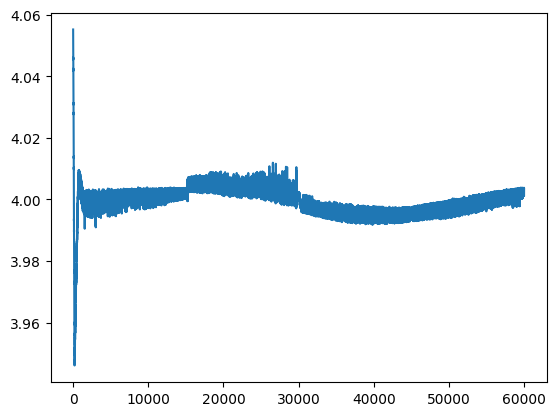

In [23]:
import numpy as np
import matplotlib.pyplot as plt

agent_path = "logs/agents/log_agents_spinning_line.txt"
anchor_path = "logs/anchors_predefined/spinning_line.txt"
index = 5

ts, ds = [], []
i = 0

with open(agent_path, "r") as f_agents, open(anchor_path, "r") as f_anchors:
    agents_lines = [agents_line for agents_line in f_agents]
    anchors_lines = [anchors_line for anchors_line in f_anchors]

    for line_agents, line_anchors in zip(agents_lines, anchors_lines):
        nums_agents = [float(item) for item in line_agents.rstrip().split(' ')]
        nums_anchors = [float(item) for item in line_anchors.rstrip().split(' ')]

        agents = np.array(nums_agents).reshape(-1, 13)
        anchors = np.array(nums_anchors).reshape(-1, 13)

        x, y, z, dx, dy, dz, ux, uy, uz, peer_state, family_id, R_vis, is_alive = agents[index]
        x_anchor, y_anchor, z_anchor, dx_anchor, dy_anchor, dz_anchor, ux_anchor, uy_anchor, uz_anchor, peer_state_anchor, family_id_anchor, R_vis_anchor, is_alive_anchor = anchors[index]
        d = np.sqrt((x - x_anchor)**2 + (y - y_anchor)**2)

        i += 1
        ts.append(i)
        ds.append(d)

plt.plot(ts, ds)
plt.show()

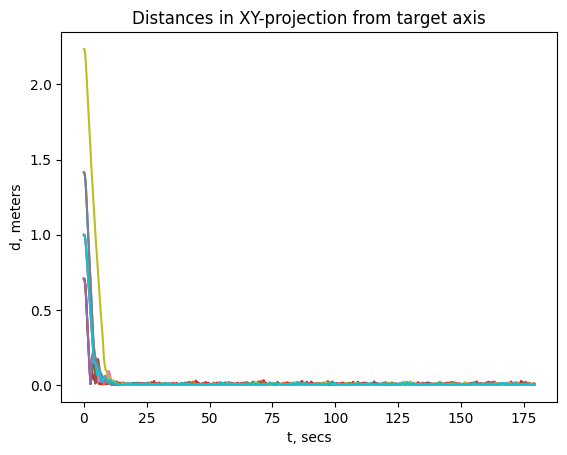

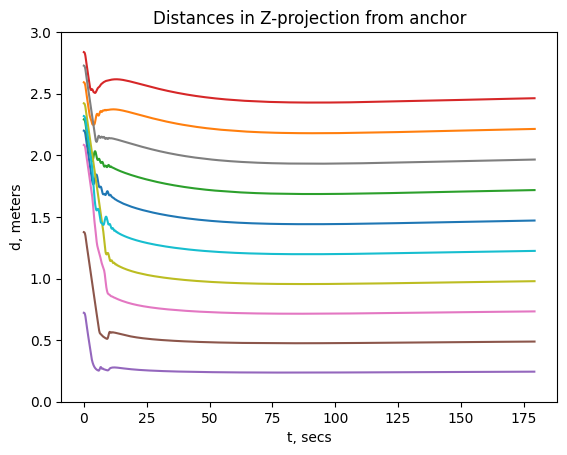

In [14]:
import numpy as np
import matplotlib.pyplot as plt

dir_static = "../logs/log_anchor_static/"
dir_moving = "../logs/log_anchor_moving/"

def plot_graphs(folder, zlim=3):
    fig_1, ax_1 = plt.subplots()
    fig_2, ax_2 = plt.subplots()

    for i in range(10):
        path = f"{folder}robot_{i + 1}.txt"
        data = np.loadtxt(path, delimiter=" ")
        vec_to_anchor_xs = data[:, 15]
        vec_to_anchor_ys = data[:, 16]
        xy_ds = np.sqrt(vec_to_anchor_xs**2 + vec_to_anchor_ys**2)
        z_ds = data[:, 17]
        ts = [0.008 * i for i in range(data.shape[0])]

        ax_1.plot(ts[::10], xy_ds[::10].tolist())
        ax_2.plot(ts[::10], (-z_ds[::10]).tolist())
        
    ax_1.set_xlabel("t, secs")
    ax_1.set_ylabel("d, meters")
    ax_1.set_title("Distances in XY-projection from target axis")
    #ax_1.show()
    fig_1.savefig(f"../images/{folder.split("/")[2]}_xy.jpg")

    ax_2.set_xlabel("t, secs")
    ax_2.set_ylabel("d, meters")
    ax_2.set_title("Distances in Z-projection from anchor")
    ax_2.set_ylim((0, zlim))
    #ax_2.show()
    fig_2.savefig(f"../images/{folder.split("/")[2]}_z.jpg")

plot_graphs(dir_static)

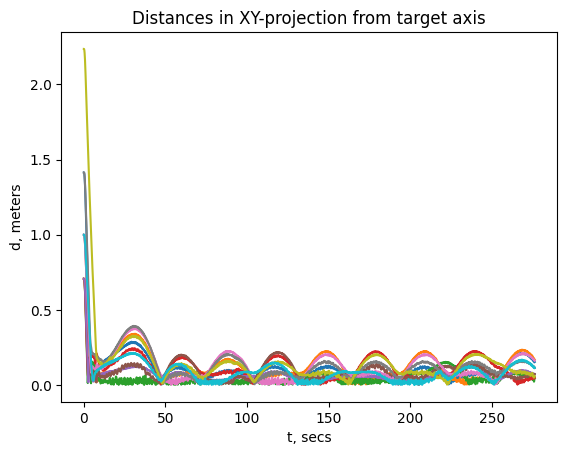

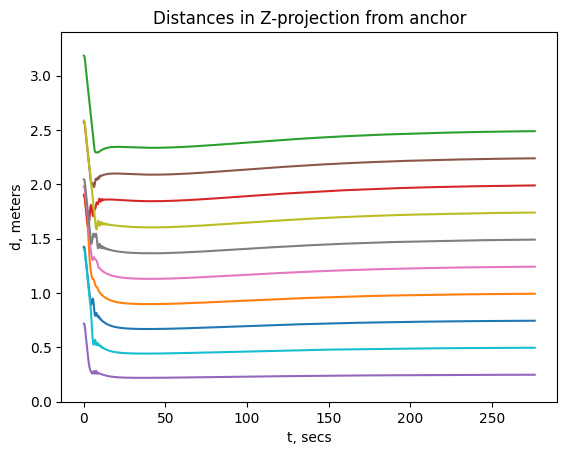

In [15]:
plot_graphs(dir_moving, zlim=3.4)

# WBT file generator

In [59]:
path = "../worlds/single_anchor_linear_100.wbt"

text = "#VRML_SIM R2023b utf8\n" \
"\n"\
"EXTERNPROTO \"https://raw.githubusercontent.com/cyberbotics/webots/R2023b/projects/objects/backgrounds/protos/TexturedBackground.proto\"\n"\
"EXTERNPROTO \"https://raw.githubusercontent.com/cyberbotics/webots/R2023b/projects/objects/backgrounds/protos/TexturedBackgroundLight.proto\"\n"\
"EXTERNPROTO \"https://raw.githubusercontent.com/cyberbotics/webots/R2023b/projects/objects/floors/protos/Floor.proto\"\n"\
"\n"\
"EXTERNPROTO \"https://raw.githubusercontent.com/cyberbotics/webots/R2023b/projects/robots/bitcraze/crazyflie/protos/Crazyflie.proto\"\n"\
"\n"\
"\n"\
"WorldInfo {\n"\
"  info [\n"\
"    \"This demonstration shows a DJI Mavic 2 PRO flying over a rural area.\"\n"\
"    \"After the drone has taken off, you can control it with the keyboard of your computer.\"\n"\
"  ]\n"\
"  title \"Crazyflie swarm\"\n"\
"  basicTimeStep 8\n"\
"  defaultDamping Damping {\n"\
"    linear 0.5\n"\
"    angular 0.5\n"\
"  }\n"\
"}\n"\
"\n"\
"Viewpoint {\n"\
"  orientation -0.03132509357312057 -0.004229724205027985 0.9995002991224087 2.901671340011777\n"\
"  position 3.392036511082617 -0.9278446049316036 0.7513423909480075\n"\
"  near 0.2\n"\
"  follow \"Crazyflie\"\n"\
"  followSmoothness 0.2\n"\
"}\n"\
"\n"\
"Background{\n"\
"   skyColor 1 1 1\n"\
"   backUrl \"textures/white.jpg\"\n"\
"   bottomUrl \"textures/white.jpg\"\n"\
"   frontUrl \"textures/white.jpg\"\n"\
"   leftUrl \"textures/white.jpg\"\n"\
"   rightUrl \"textures/white.jpg\"\n"\
"   topUrl \"textures/white.jpg\"\n"\
"   luminosity 0\n"\
"}\n"\
"\n"\
"TexturedBackgroundLight {\n"\
"    castShadows FALSE\n"\
"}\n"\
"\n"\
"Floor {\n"\
"  translation 0 -4.22 0\n"\
"  rotation 1 0 0 0\n"\
"  size 200 164\n"\
"  tileSize 1 1\n"\
"  appearance PBRAppearance {\n"\
"    baseColorMap ImageTexture {\n"\
"      url [\n"\
"        \"textures/checkered_parquetry.jpg\"\n"\
"      ]\n"\
"    }\n"\
"    roughness 1\n"\
"    metalness 0\n"\
"    transparency 0.04\n"\
"  }\n"\
"}\n"\
"\n"\
"Crazyflie {\n"\
"  translation 0 0 0.015\n"\
"  rotation 0 0 1 0\n"\
"  controller \"anchor\"\n"\
"  supervisor TRUE\n"\
"  name \"robot_0\"\n"\
"}"\
""

n_agents = 30

x_min, x_max = -10, 10
y_min, y_max = -10, 10

min_bound = np.array([x_min, y_min])
max_bound = np.array([x_max, y_max])

for i in range(n_agents):
    x, y = np.random.uniform(min_bound, max_bound)

    agent_text = "Crazyflie {\n"\
    f"  translation {x} {y} 0.015\n"\
    "  rotation 0 0 1 0\n"\
    "  controller \"agent\"\n"\
    "  supervisor TRUE\n"\
    f"  name \"robot_{i + 1}\"\n"\
    "}\n"\
    "\n"

    text += agent_text

with open(path, "w") as file:
    file.write(text)
